# Comparing self reported answers in Strategic Learning groups

## Factors per task

[Informed](#A1)

[Uninformed](#A2)

[All subjects](#A3)

## Comparison between factors and possible correlations

[Relation with respect to reported interest](#A5)

[Relation between accuracy and selection](#A6)

[Relation with respect to reported complexity](#A7)

[Relation with respect to reported progress](#A8)

[Relation with respect to reported time spent on task](#A9)

[Filtering non exploratory subjects](#A10)

## Setup and imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

/usr/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
execute_notebook("file-preprocessing.ipynb")

[b'free']


In [3]:
tasks = 4
catLab = ['1D', 'I1D', '2D', 'R']

usersF = np.shape(np.unique(csvIntF[:,0]))[0]
# For free exploration with Training
usersFT = np.shape(np.unique(csvIntFT[:,0]))[0]
usersFTI = np.shape(np.unique(informed[:,0]))[0]
usersFTU = usersFT-usersFTI
# For strategic learning
usersS = np.shape(np.unique(csvIntS[:,0]))[0]
usersSI = np.shape(np.unique(informedSE[:,0]))[0]
usersSU = usersS-usersSI

In [4]:
execute_notebook("file-preprocessing-reported-answers.ipynb")

Free Exploration - general metrics loaded
Free Exploration with Training - general metrics loaded
Strategic Learning - general metrics loaded


In [5]:
# Load first pilot free exploration
#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(6:11)
fpilot = np.loadtxt('fpilot.txt')
# For the second pilot the fields rule-Mons(10),learning-Mons(11) are inverted
# and rule is not the same kind of field as rule in the first pilot
# switch columns in first pilot to make easier to handle
fpilot[:,[10, 11]] = fpilot[:,[11, 10]]

In [6]:
#user(0), cond(1) cat-task complexity(2), # task selec(3), % sele(4), # correct on task(5), % correct(6), 
#answers(7:12)
# Split by users that received information about the existence of a random task and those that didn't
informed = stra[stra[:,1]==0]
uninformed = stra[stra[:,1]==1]
#print(spilot[-1,:])
# Remove column 
stra = np.delete(stra, 1, axis=1)
informed = np.delete(informed, 1, axis=1)
uninformed = np.delete(uninformed, 1, axis=1)

In [7]:
import itertools
import matplotlib.cm as cm

learnLab = ['gradual', 'insight', 'none', 'unsure']
ruleLab = ['no', 'unsure', 'yes']
def plotAgainstTask(arr, titles, offset, experimentNumber):
    
    # create an array of colors based on arr[:,0] so r,r,r,r,b,b,b,b,...
    if experimentNumber < 3:
        co = ["r", "b", "g", "k", "y"]
    else:
        co = cm.viridis(np.linspace(0, 1, usersS))
    colors = [co[uid] for uid in arr[:,0].astype(int)]
    for i in range(len(titles)):
        fig, ax = plt.subplots(figsize=(5, 5))
        
        # Control tick frequency
        plt.xticks(np.arange(min(arr[:,1]), max(arr[:,1])+1, 1.0))
        # Rename ticks
        ax.set_xticklabels(catLab)
        
        # Set y axis range and labels
        if titles[i] == 'Rule' and experimentNumber == 1:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(ruleLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        elif titles[i] == 'Type of Learning' and experimentNumber != 3:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(learnLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        else:
            ax.set_ylim([-0.5,10.5])
        
        plt.scatter(arr[:,1], arr[:,offset+i], c=colors, s=80, alpha=0.5)
        #Get means and std
        means = [np.mean(arr[arr[:,1] == k,offset+i]) for k in range(tasks)]
        std = [np.std(arr[arr[:,1] == k,offset+i]) for k in range(tasks)]
        plt.plot(means, 'k--', alpha=0.5)
        plt.plot(np.asarray(means)+np.asarray(std), 'k--', alpha=0.05)
        plt.plot(np.asarray(means)-np.asarray(std), 'k--', alpha=0.05)
        plt.ylabel(titles[i])
        plt.xlabel('Tasks')
        plt.show()


<a id='A1'></a>
## Informed

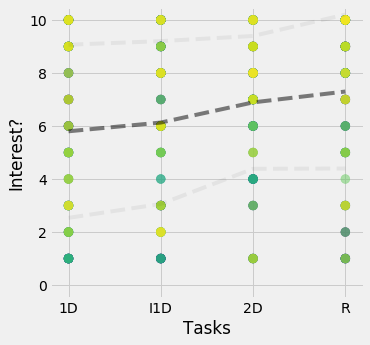

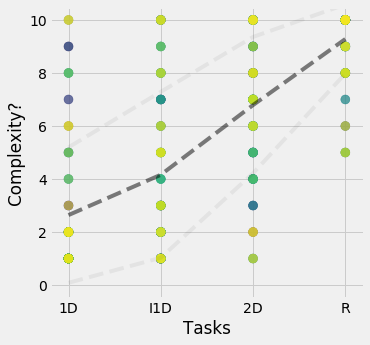

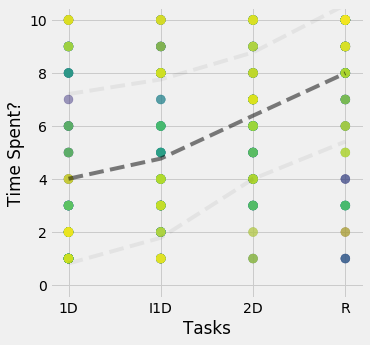

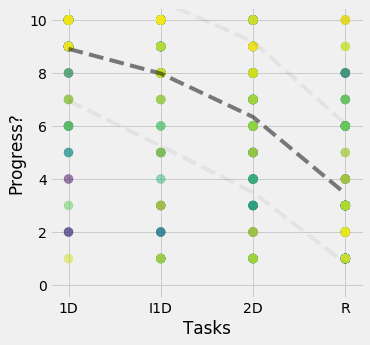

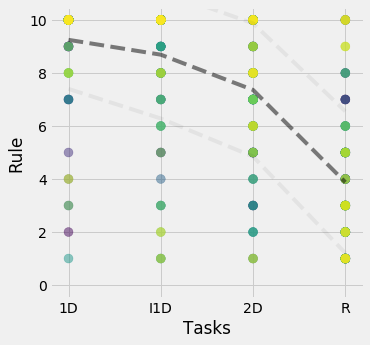

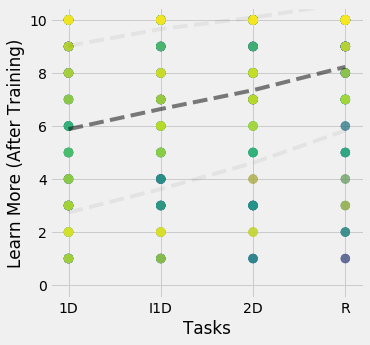

In [8]:
ytitles = ['Interest?', 'Complexity?', 'Time Spent?', 'Progress?', 'Rule', 'Learn More (After Training)']
plotAgainstTask(informed, ytitles, 6, 3)

<a id='A2'></a>
## Uninformed

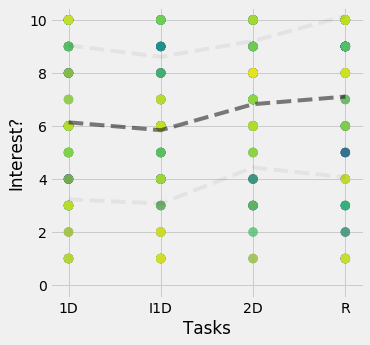

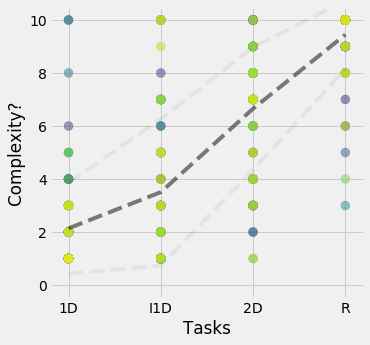

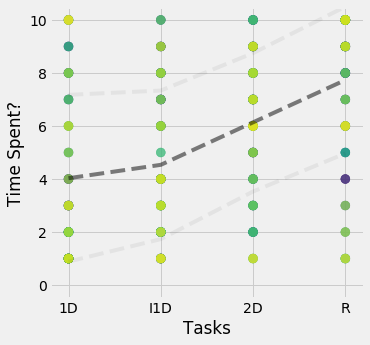

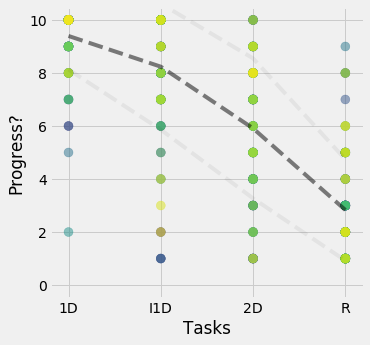

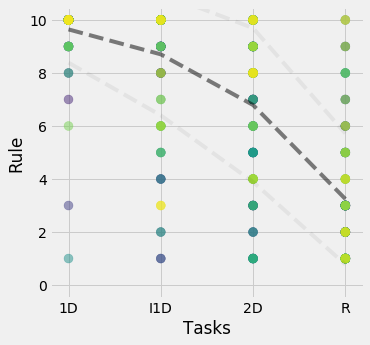

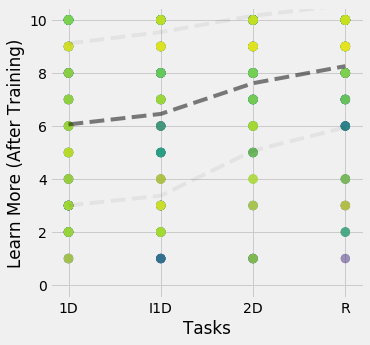

In [9]:
plotAgainstTask(uninformed, ytitles, 6, 3)

<a id='A3'></a>
## All subjects

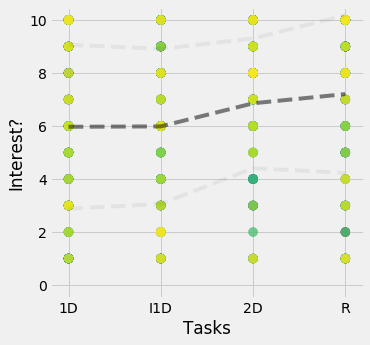

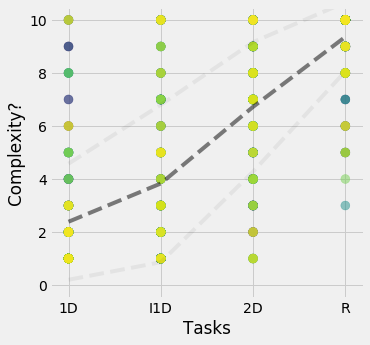

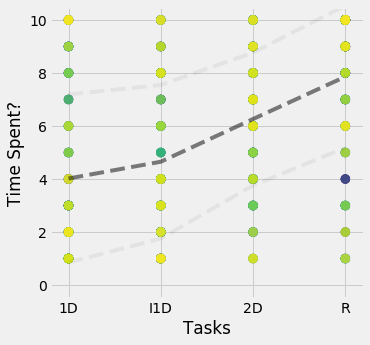

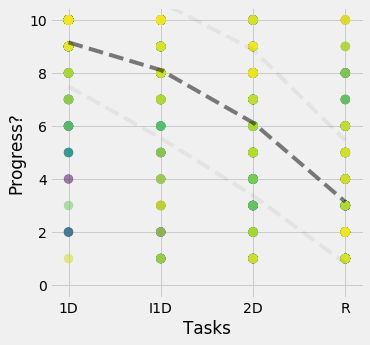

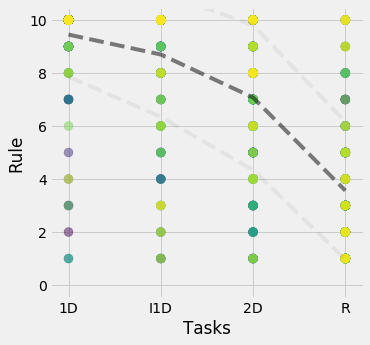

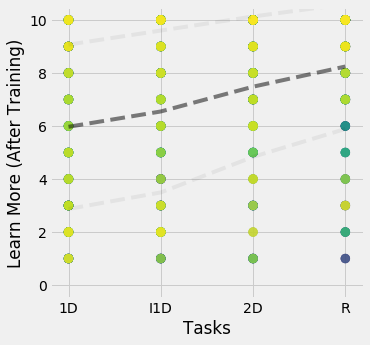

In [10]:

plotAgainstTask(stra, ytitles, 6, 3)

In [11]:
# In the second pilot 
# id(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5)
# int(6), complex(7), time(8), prog(9), rule(10), learn(11), trCorrect(12), tr%Correct(13), 
# teCorrect(14), te%Correct(15)
def plotCombined(array1, array2, axisx, axisy, phasePilot2='exploration'):
    arr1 = array1.copy()
    arr2 = array2.copy()
    dict = {'tkCplx': [1,'Task'], 
            'tkNSel': [2,'Times Selected'], 
            'tkPSel': [3,'Selected (Proportion)'],
            'tkNCorr': [4,'Times Correct'],
            'tkPCorr': [5,'Correct (Proportion)'],
            'interest': [6,'Interest'],
            'complex': [7,'Complexity'],
            'time': [8,'Time invested'],
            'progress': [9,'Progress'],
            'rule': [10,'Rule'],
            'learn': [11,'Type of Learning']
           }
    xaxis, yaxis = dict[axisx][0], dict[axisy][0]
    
    if phasePilot2 == 'training':
        arr2[:,[4, 5]] = arr2[:,[12, 13]]
    elif phasePilot2 == 'testing':
        arr2[:,[4, 5]] = arr2[:,[14, 15]]
    
    fig, ax = plt.subplots(figsize=(5, 5))

    plt.scatter(arr1[:,xaxis], arr1[:,yaxis], c='r', s=80, alpha=0.5)
    plt.scatter(arr2[:,xaxis], arr2[:,yaxis], c='b', s=80, alpha=0.5)
    
    # Fit a polynomial
    m, b = np.polyfit(arr1[:,xaxis], arr1[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'r-', label='1st P Free Exp')
    m, b = np.polyfit(arr2[:,xaxis], arr2[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'b-', label=''.join(['Stra (',phasePilot2,')']))
    
    plt.xlabel(dict[axisx][1])
    plt.ylabel(dict[axisy][1])
    
    plt.legend()
    plt.show()

<a id='A5'></a>
## Relation with respect to reported interest

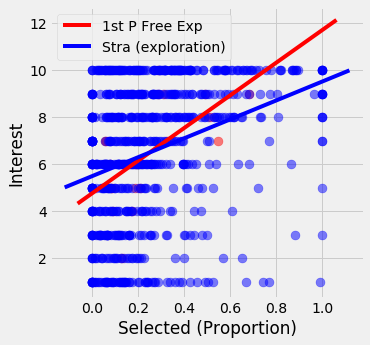

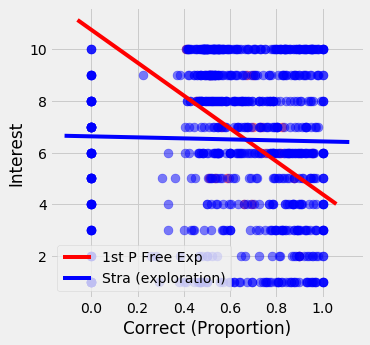

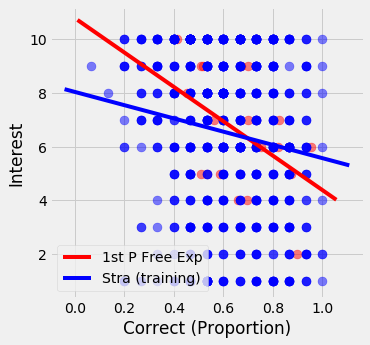

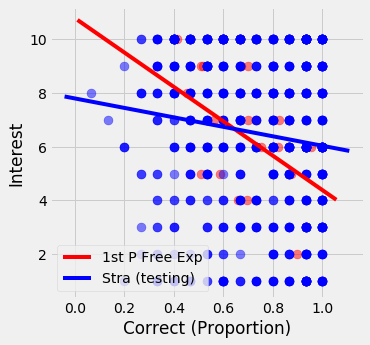

In [12]:
#%chosen and rep interest
plotCombined(fpilot,stra,'tkPSel','interest','exploration')
plotCombined(fpilot,stra,'tkPCorr','interest','exploration')
plotCombined(fpilot,stra,'tkPCorr','interest','training')
plotCombined(fpilot,stra,'tkPCorr','interest','testing')

<a id='A6'></a>
## Relation between accuracy and selection

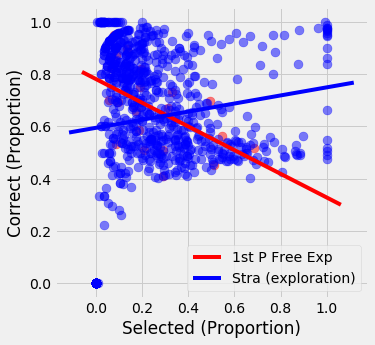

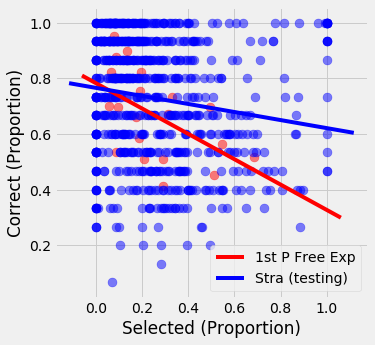

In [13]:
# %correct and %chosen
plotCombined(fpilot,stra,'tkPSel','tkPCorr','exploration')
plotCombined(fpilot,stra,'tkPSel','tkPCorr','testing')

<a id='A7'></a>
## Relation with respect to reported complexity

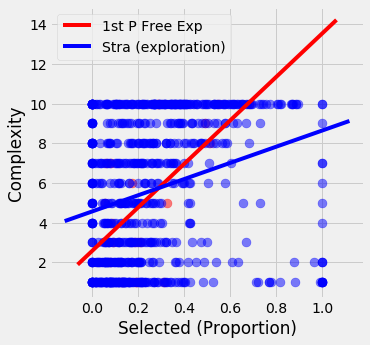

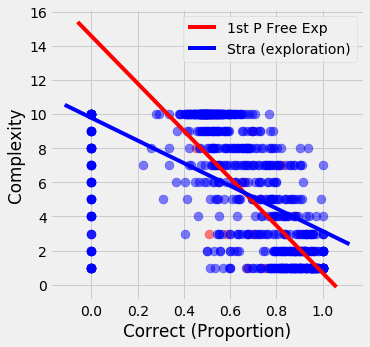

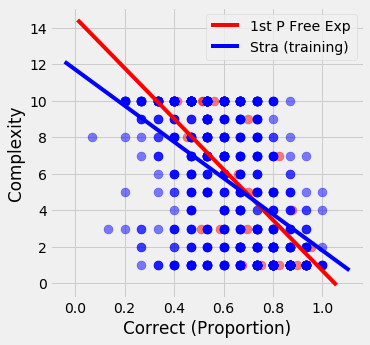

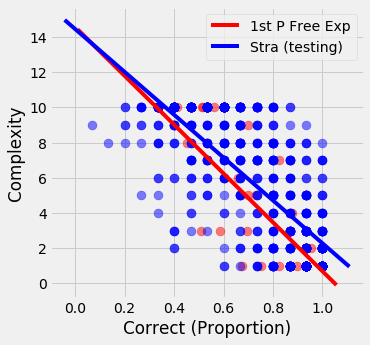

In [14]:
plotCombined(fpilot,stra,'tkPSel','complex','exploration')
plotCombined(fpilot,stra,'tkPCorr','complex','exploration')
plotCombined(fpilot,stra,'tkPCorr','complex','training')
plotCombined(fpilot,stra,'tkPCorr','complex','testing')

<a id='A8'></a>
## Relation with respect to reported progress

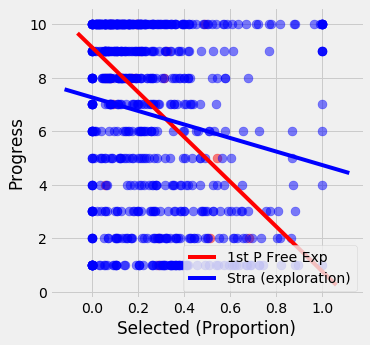

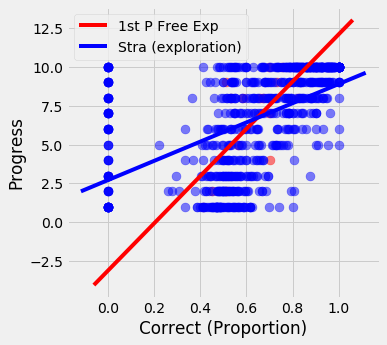

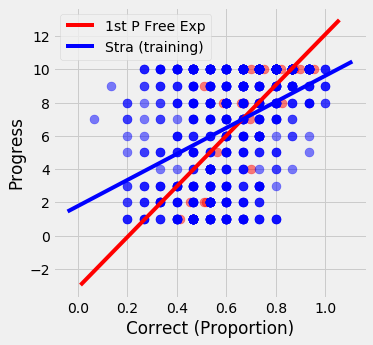

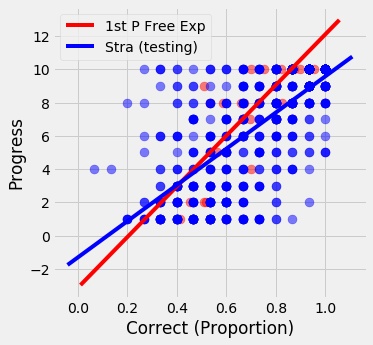

In [15]:
plotCombined(fpilot,stra,'tkPSel','progress','exploration')
plotCombined(fpilot,stra,'tkPCorr','progress','exploration')
plotCombined(fpilot,stra,'tkPCorr','progress','training')
plotCombined(fpilot,stra,'tkPCorr','progress','testing')

<a id='A9'></a>
## Relation with respect to reported time spent on task

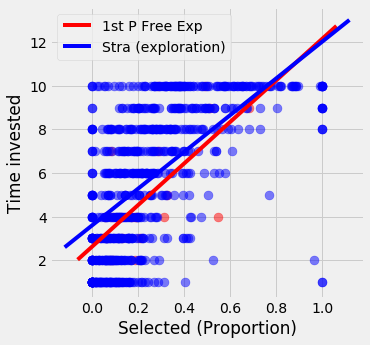

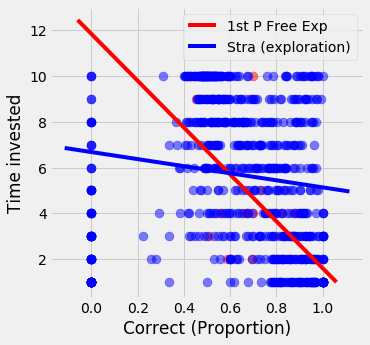

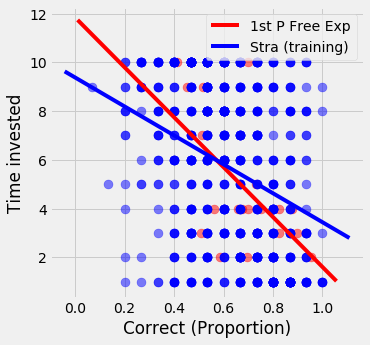

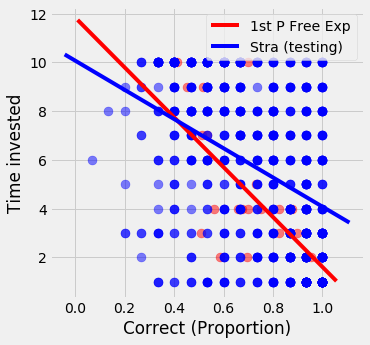

In [16]:
plotCombined(fpilot,stra,'tkPSel','time','exploration')
plotCombined(fpilot,stra,'tkPCorr','time','exploration')
plotCombined(fpilot,stra,'tkPCorr','time','training')
plotCombined(fpilot,stra,'tkPCorr','time','testing')

<a id='A10'></a>
## Filtering non exploratory subjects

In [ ]:
# Get uid of those that did not explore the four tasks
nexplid = np.unique(stra[stra[:,2]==0, 0])

# Get rows with information related to those uids
ranges = tuple(range(n*4,n*4+4) for n in nexplid.astype('int'))

# Remove rows
straMod = np.delete(stra, ranges, axis=0)

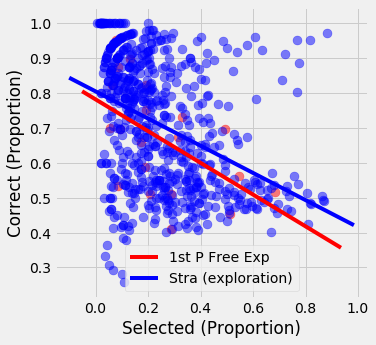

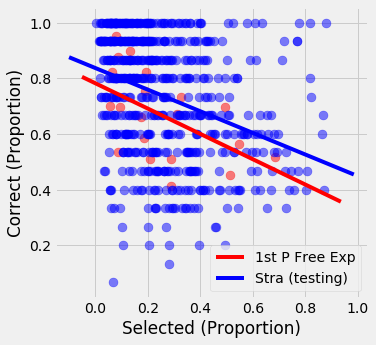

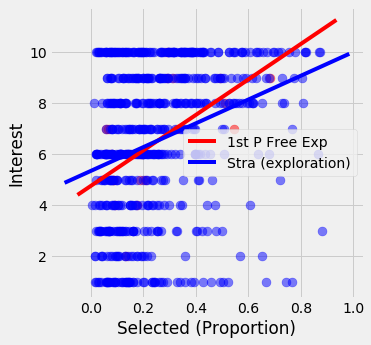

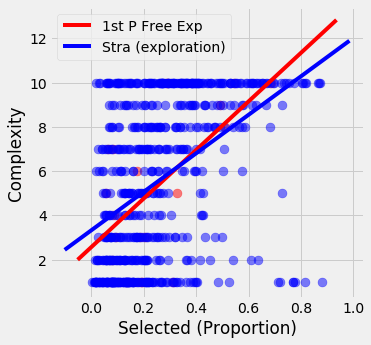

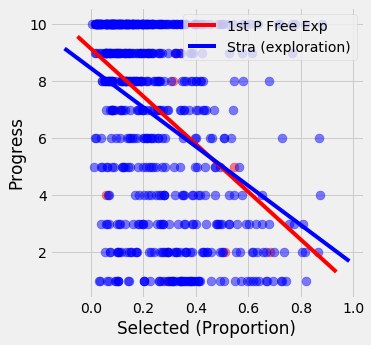

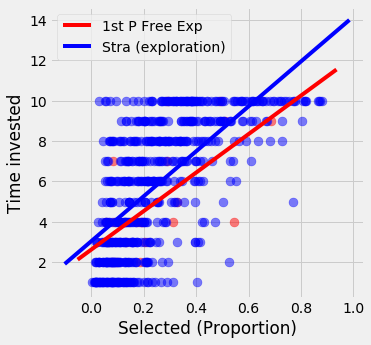

In [18]:
plotCombined(fpilot,straMod,'tkPSel','tkPCorr','exploration')
plotCombined(fpilot,straMod,'tkPSel','tkPCorr','testing')
plotCombined(fpilot,straMod,'tkPSel','interest','exploration')
plotCombined(fpilot,straMod,'tkPSel','complex','exploration')
plotCombined(fpilot,straMod,'tkPSel','progress','exploration')
plotCombined(fpilot,straMod,'tkPSel','time','exploration')